In [43]:
import os
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli93\Miniconda3\envs\py3gpu\Library\bin"
#os.environ['NUMBA_ENABLE_CUDASIM']="1"

import sys
sys.path.append('C:/Users/hyli93/Documents/GitHub/Phasing/')

import phase
import phase.gpuutil2d as gpuutil

from pyculib import fft as pfft
from numba import cuda
import numpy as np
from skimage import measure as ms
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import math
import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

The image size is 651 by 597


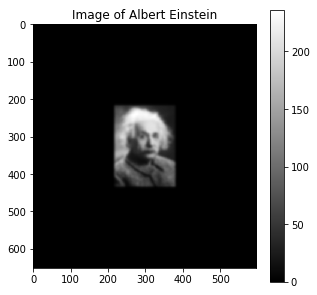

In [57]:
############################################################################################################################################
# Load the pattern
############################################################################################################################################
#Read in source image
source = plt.imread("../tests/samples/Albert_Einstein.jpg",format="jpg")

# Because the original image is too large downsample the image by a factor of 20
source = ms.block_reduce(source, (20,20), np.mean)

############################################################################################################################################
# Simulate the oversampling
############################################################################################################################################
## pad_len is the size of the support
pad_len = source.shape[0]
padded = np.pad(source, ((pad_len, pad_len),(pad_len, pad_len)), 'constant', 
                constant_values=((0,0),(0,0)))
padded = sn.filters.gaussian_filter(input=padded, sigma=3)


#Show this figure
fig = plt.figure(figsize=(5,5))
plt.imshow(padded, cmap="gray")
plt.colorbar()
plt.title("Image of Albert Einstein")
print("The image size is %d by %d"%(padded.shape[0], padded.shape[1]))

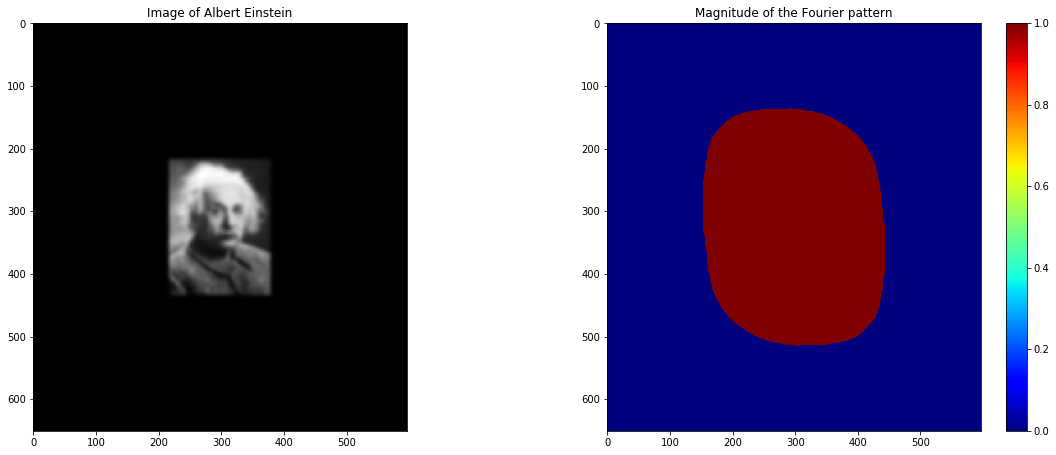

In [58]:
# Calculate the fourier transformation
fourier_pattern = np.fft.ifftshift(np.fft.fft2(padded))
magnitude = np.abs(fourier_pattern)

# Get the autocorrelation
intenstiy = np.square(magnitude)
autocorrelation_perfect = np.fft.fftshift(np.abs(np.fft.fft2(intenstiy)))

max_value = np.max(autocorrelation_perfect)
mask_holder_perfect = np.zeros_like(autocorrelation_perfect)
mask_holder_perfect[autocorrelation_perfect>0.05*max_value]=1

# Calculate the fourier transformation
fig, axes = plt.subplots(ncols=2, nrows=1)
fig.set_figwidth(20)
fig.set_figheight(7.5)

axes[0].imshow(padded, cmap='gray')
axes[0].set_title("Image of Albert Einstein")

tmp = axes[1].imshow(mask_holder_perfect, cmap='jet')
axes[1].set_title("Magnitude of the Fourier pattern")

fig.colorbar(mappable=tmp, ax=axes[1])

plt.show()


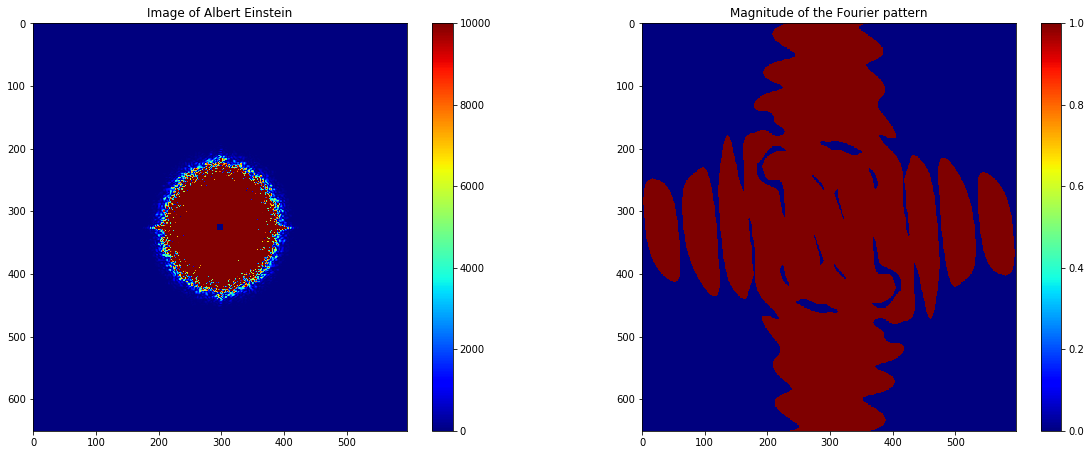

In [61]:
# Calculate the fourier transformation
fourier_pattern = np.fft.ifftshift(np.fft.fft2(padded))
magnitude = np.abs(fourier_pattern)

# Get the autocorrelation
intenstiy = np.square(magnitude)
intensity_modified = np.copy(intenstiy)

# Add some beam stop
stop_radius = 5
intensity_modified[326-stop_radius: 326+stop_radius, 299-stop_radius: 299+stop_radius ]=0
autocorrelation_modify = np.fft.fftshift(np.abs(np.fft.fft2(intensity_modified)))

max_value = np.max(autocorrelation_modify)
mask_holder_mod = np.zeros_like(autocorrelation_modify)
mask_holder_mod[autocorrelation_modify>max_value*0.03] = 1

# Calculate the fourier transformation
fig, axes = plt.subplots(ncols=2, nrows=1)
fig.set_figwidth(20)
fig.set_figheight(7.5)

tmp_0 = axes[0].imshow(intensity_modified, cmap='jet', vmax=1e4)
axes[0].set_title("Image of Albert Einstein")

tmp = axes[1].imshow(mask_holder_mod, cmap='jet')
axes[1].set_title("Magnitude of the Fourier pattern")

fig.colorbar(mappable=tmp, ax=axes[1])
fig.colorbar(mappable=tmp_0, ax=axes[0])

plt.show()


In [50]:
np.unravel_index(np.argmax(intenstiy), intenstiy.shape)

(326, 299)